In [81]:
import osmnx as ox
import pandas as pd
import requests
import geopandas as gpd
from shapely.geometry import shape

## Descarga de los grafos

In [82]:
def get_walking_network(place_name: str):
    """
    Get the walking network for a specified place using OSMnx.

    Parameters:
        place_name (str): The name of the place to get the walking network for.

    Returns:
        graph: A directed graph representing the walking network.
    """
    graph = ox.graph_from_place(place_name, network_type="walk")

    return graph


def get_cycling_network(place_name: str):
    """
    Get the cycling network for a specified place using OSMnx.

    Parameters:
        place_name (str): The name of the place to get the cycling network for.

    Returns:
        graph: A directed graph representing the cycling network.
    """
    graph = ox.graph_from_place(
        place_name,
        network_type="bike",
        custom_filter='["highway"~"cycleway|path|unclassified|tertiary|track|busway|secondary_link"]',  # |footway|pedestrian
    )

    return graph


# custom_filter='["highway"~"cycleway|path|unclassified|tertiary|track|busway"]'

# walk_graph = get_walking_network("Valencia, Spain")
cycle_graph = get_cycling_network("Valencia, Spain")

# Save the graphs to files
# ox.save_graphml(walk_graph, filepath="../data/valencia_walking_network.graphml")
ox.save_graphml(cycle_graph, filepath="../data/valencia_cycling_network.graphml")

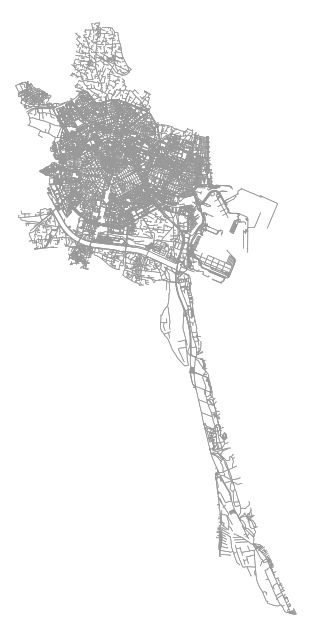

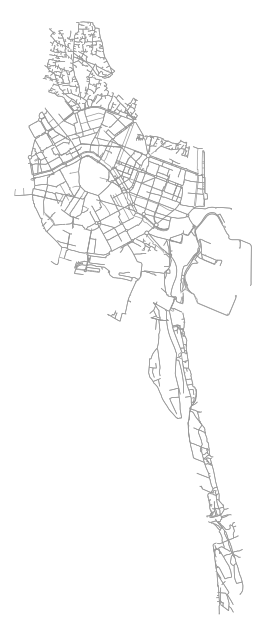

Text(0.5, 1.0, 'Cycling Network in Valencia, Spain')

In [83]:
# Load the saved graphs from files
walk_graph = ox.load_graphml("../data/valencia_walking_network.graphml")
cycle_graph = ox.load_graphml("../data/valencia_cycling_network.graphml")

# Pintar ambos grafos sobre un mapa, para ver que se corresponden bien las calles
fig_walk, ax_walk = ox.plot_graph(
    walk_graph, node_size=0, edge_linewidth=0.5, bgcolor="white"
)
ax_walk.set_title("Walking Network in Valencia, Spain")
fig_cycle, ax_cycle = ox.plot_graph(
    cycle_graph, node_size=0, edge_linewidth=0.5, bgcolor="white"
)
ax_cycle.set_title("Cycling Network in Valencia, Spain")

In [84]:
# convertir las aritas a GeoDataFrames para poder guardarlas como shapefiles

walk_edges = ox.graph_to_gdfs(walk_graph, nodes=False, edges=True)
cycle_edges = ox.graph_to_gdfs(cycle_graph, nodes=False, edges=True)

cycle_edges

osmid   highway  \
u           v           key                                                
25767478    297664578   0                             41197570  tertiary   
            25767477    0    [217941240, 831769962, 831769955]  tertiary   
25767479    4683229675  0                              6277218  tertiary   
29834279    111148850   0               [176260048, 211248458]  tertiary   
29935835    4676342089  0                              4823214  tertiary   
...                                                        ...       ...   
12734708709 1800207369  0             [1340641089, 1325526833]  cycleway   
            2017887011  0                           1375376819  cycleway   
12737169105 1555329321  0                           1313829854  cycleway   
12901730099 12901742902 0                           1393797773    busway   
12901742902 254902054   0                            625596129    busway   

                                                                        name  \
u           v           key                                                    
25767478    297664578   0                                    Plaça d'Amèrica   
            25767477    0                                    Plaça d'Amèrica   
25767479    4683229675  0                       Avinguda de Navarro Reverter   
29834279    111148850   0    [Plaça d'Espanya, Carrer de Sant Vicent Màrtir]   
29935835    4676342089  0                                    Carrer de Jesús   
...                                                                      ...   
12734708709 1800207369  0                                                NaN   
            2017887011  0                                                NaN   
12737169105 1555329321  0                                                NaN   
12901730099 12901742902 0                                                NaN   
12901742902 254902054   0                                   Avinguda del Cid   

                             oneway       reversed     length  \
u           v           key                                     
25767478    297664578   0      True          False  43.484692   
            25767477    0      True          False  20.540533   
25767479    4683229675  0      True          False  16.171846   
29834279    111148850   0      True          False  87.958855   
29935835    4676342089  0      True          False   9.220914   
...                             ...            ...        ...   
12734708709 1800207369  0     False  [False, True]  74.158999   
            2017887011  0     False           True  45.950770   
12737169105 1555329321  0     False          False  74.516281   
12901730099 12901742902 0      True          False  27.990942   
12901742902 254902054   0      True          False  40.019607   

                                                                      geometry  \
u           v           key                                                      
25767478    297664578   0    LINESTRING (-0.36548 39.47061, -0.36536 39.470...   
            25767477    0    LINESTRING (-0.36548 39.47061, -0.36542 39.470...   
25767479    4683229675  0    LINESTRING (-0.36825 39.47185, -0.36807 39.47182)   
29834279    111148850   0    LINESTRING (-0.38145 39.46554, -0.3814 39.4657...   
29935835    4676342089  0    LINESTRING (-0.38125 39.46872, -0.38131 39.46865)   
...                                                                        ...   
12734708709 1800207369  0    LINESTRING (-0.33224 39.45949, -0.33224 39.459...   
            2017887011  0    LINESTRING (-0.33224 39.45949, -0.33232 39.459...   
12737169105 1555329321  0    LINESTRING (-0.36118 39.46778, -0.3612 39.4677...   
12901730099 12901742902 0    LINESTRING (-0.39223 39.46739, -0.39214 39.467...   
12901742902 254902054   0    LINESTRING (-0.39197 39.46724, -0.39192 39.467...   

                              lanes maxspeed width junction bridge  ref  \
u           v           key            

In [85]:
cycle_edges["highway"].value_counts()

highway
cycleway                      2288
track                         1440
tertiary                      1094
unclassified                  1008
path                           251
tertiary_link                   45
[path, track]                   26
[track, unclassified]           20
secondary_link                  14
[cycleway, path]                14
busway                           6
[tertiary, tertiary_link]        3
[tertiary, secondary_link]       2
[tertiary, track]                2
[path, unclassified]             2
Name: count, dtype: int64

## Funtes de la ciudad

In [86]:
def get_valencian_open_data(url: str, params: dict = None):
    """
    Fetch open data from the Valencia City Council's open data portal.

    Returns:
        dict: A dictionary containing the fetched data.
    """
    df = pd.DataFrame()
    response = requests.get(url, params=params)

    if response.status_code == 200:
        total_records = response.json().get("total_count")
        print(f"Total records found: {total_records}")

        for start in range(0, total_records, params.get("rows", 10)):
            params["start"] = start
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                records = data.get("results", [])
                df = pd.concat([df, pd.DataFrame(records)], ignore_index=True)
            else:
                raise Exception(
                    f"Failed to fetch data: {response.status_code}\n{response.text}"
                )

        return df
    else:
        raise Exception(
            f"Failed to fetch data: {response.status_code}\n{response.text}"
        )


params = {
    "rows": 100,
}

url = "https://valencia.opendatasoft.com//api/explore/v2.1/catalog/datasets/fonts-daigua-publica-fuentes-de-agua-publica/records"
valencian_data = get_valencian_open_data(url, params)
valencian_data

Total records found: 832


objectid                                  calle codigo  \
0           5  PASEO MARITIMO/HISTORIADOR COLOMA--2ª   1151   
1           9   BULEVAR SUR - BARRACA AUSIAS MARCH 1   1040   
2          11                      PLAZA DEL MERCADO    110   
3          17               JARDIN PLAZA DE LA REINA    104   
4          22            CEMENTERIO GENERAL SEC 20-1   C121   
..        ...                                    ...    ...   
827       230          PLATERO SUAREZ /CALLE SAGUNTO    509   
828       267                AVDA. BLASCO IBAÑEZ, 96   1312   
829       276          PLAZA JOAQUIN MUÑOZ PEIRATS 1   1607   
830       150           PL DOCTOR LORENZO DE LA FLOR   1155   
831       159          CEMENTERIO GENERAL SEC 6 IZDA   C113   

                                                  foto  \
0    http://mapas.valencia.es/WebsMunicipales/layar...   
1    http://mapas.valencia.es/WebsMunicipales/layar...   
2    http://mapas.valencia.es/WebsMunicipales/layar...   
3    http://mapas.valencia.es/WebsMunicipales/layar...   
4    http://mapas.valencia.es/WebsMunicipales/layar...   
..                                                 ...   
827  http://mapas.valencia.es/WebsMunicipales/layar...   
828  http://mapas.valencia.es/WebsMunicipales/layar...   
829  http://mapas.valencia.es/WebsMunicipales/layar...   
830  http://mapas.valencia.es/WebsMunicipales/layar...   
831  http://mapas.valencia.es/WebsMunicipales/layar...   

                                             geo_shape  \
0    {'type': 'Feature', 'geometry': {'coordinates'...   
1    {'type': 'Feature', 'geometry': {'coordinates'...   
2    {'type': 'Feature', 'geometry': {'coordinates'...   
3    {'type': 'Feature', 'geometry': {'coordinates'...   
4    {'type': 'Feature', 'geometry': {'coordinates'...   
..                                                 ...   
827  {'type': 'Feature', 'geometry': {'coordinates'...   
828  {'type': 'Feature', 'geometry': {'coordinates'...   
829  {'type': 'Feature', 'geometry': {'coordinates'...   
830  {'type': 'Feature', 'geometry': {'coordinates'...   
831  {'type': 'Feature', 'geometry': {'coordinates'...   

                                          geo_point_2d  
0    {'lon': -0.3245649933146064, 'lat': 39.4703178...  
1    {'lon': -0.37167000776736375, 'lat': 39.445251...  
2    {'lon': -0.37922498535436144, 'lat': 39.474571...  
3    {'lon': -0.37553501058701816, 'lat': 39.474624...  
4    {'lon': -0.3986200087544989, 'lat': 39.4429817...  
..                                                 ...  
827  {'lon': -0.37407299938987454, 'lat': 39.485198...  
828  {'lon': -0.35000500025418557, 'lat': 39.474304...  
829  {'lon': -0.3951179978157639, 'lat': 39.4869956...  
830  {'lon': -0.33100999912996454, 'lat': 39.469399...  
831  {'lon': -0.3980959950145709, 'lat': 39.4459724...  

[832 rows x 6 columns]

In [87]:
valencian_data.to_csv("../data/fonts_publiques.csv", index=False)

## Estciones de ValenBisi

In [88]:
url = "https://valencia.opendatasoft.com//api/explore/v2.1/catalog/datasets/valenbisi-disponibilitat-valenbisi-dsiponibilidad/records"
valenbisi_data = get_valencian_open_data(url, params)
valenbisi_data

Total records found: 273


address  number open  available  free  \
0                            Baleares - Lebón      60    T          4    14   
1                Vicent Vidal - Pintor Maella      61    T         14     4   
2                                Serrería, 67      84    T         12     2   
3       Blasco Ibañez - Poeta Durán Tortajada      93    T         28    10   
4                  Peris y Valero - Cabo Jubi      38    T          5    10   
..                                        ...     ...  ...        ...   ...   
268  Padre Esteban Pernet - Casa Misericordia     263    T          3    14   
269            Alcasser - Poeta Alberto Lista     265    T          4    11   
270            Beniferri - Vicent Tomás Martí     267    T         13     2   
271         Salvador Cerveró - Carlos Cortina     271    T          4    11   
272                    Moraira - Alta del Mar     273    T         14     1   

     total ticket           updated_at  \
0       19      F  12/06/2025 21:10:03   
1       20      F  12/06/2025 21:10:03   
2       15      F  12/06/2025 21:10:03   
3       38      F  12/06/2025 21:10:03   
4       15      F  12/06/2025 21:10:03   
..     ...    ...                  ...   
268     18      F  12/06/2025 21:10:03   
269     15      F  12/06/2025 21:10:03   
270     16      F  12/06/2025 21:10:03   
271     15      F  12/06/2025 21:10:03   
272     15      F  12/06/2025 21:10:03   

                                             geo_shape  \
0    {'type': 'Feature', 'geometry': {'coordinates'...   
1    {'type': 'Feature', 'geometry': {'coordinates'...   
2    {'type': 'Feature', 'geometry': {'coordinates'...   
3    {'type': 'Feature', 'geometry': {'coordinates'...   
4    {'type': 'Feature', 'geometry': {'coordinates'...   
..                                                 ...   
268  {'type': 'Feature', 'geometry': {'coordinates'...   
269  {'type': 'Feature', 'geometry': {'coordinates'...   
270  {'type': 'Feature', 'geometry': {'coordinates'...   
271  {'type': 'Feature', 'geometry': {'coordinates'...   
272  {'type': 'Feature', 'geometry': {'coordinates'...   

                                          geo_point_2d  \
0    {'lon': -0.3517763125261459, 'lat': 39.4622312...   
1    {'lon': -0.34783029886743094, 'lat': 39.461293...   
2    {'lon': -0.33522597686590844, 'lat': 39.467123...   
3    {'lon': -0.34380927742382206, 'lat': 39.472282...   
4    {'lon': -0.37024937736936264, 'lat': 39.459402...   
..                                                 ...   
268  {'lon': -0.4096445056541294, 'lat': 39.4670433...   
269  {'lon': -0.40811749816977394, 'lat': 39.470973...   
270  {'lon': -0.4059294716064297, 'lat': 39.4941684...   
271  {'lon': -0.38989141267304944, 'lat': 39.499279...   
272  {'lon': -0.3332722584595297, 'lat': 39.4503052...   

                    update_jcd  
0    2025-06-12T21:03:47+00:00  
1    2025-06-12T21:06:18+00:00  
2    2025-06-12T21:07:55+00:00  
3    2025-06-12T21:09:32+00:00  
4    2025-06-12T21:06:05+00:00  
..                         ...  
268  2025-06-12T21:06:05+00:00  
269  2025-06-12T21:06:56+00:00  
270  2025-06-12T21:06:59+00:00  
271  2025-06-12T21:01:56+00:00  
272  2025-06-12T21:06:47+00:00  

[273 rows x 11 columns]

In [89]:
valenbisi_data.to_csv("../data/valenbisi_disponibilitat.csv", index=False)

In [90]:
valenbisi_data["geo_shape"][0]

{'type': 'Feature',
 'geometry': {'coordinates': [-0.3517763125261459, 39.46223128102797],
  'type': 'Point'},
 'properties': {}}

## Unión grafos con puntos valenbisi

In [91]:
def get_valenbisi_stations(valenbisi_data):
    """
    Extract Valenbisi stations from the Valenbisi data.

    Parameters:
        valenbisi_data (DataFrame): A DataFrame containing Valenbisi data.

    Returns:
        GeoDataFrame: A GeoDataFrame containing the Valenbisi stations.
    """

    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(valenbisi_data, geometry=valenbisi_data["geometry"])
    gdf.set_crs(epsg=4326, inplace=True)  # Set the coordinate reference system

    return gdf


def get_nearest_cycle_station(graph, geovalenbisi):
    """
    Find the nearest point in the graph to each Valenbisi station.
    Parameters:
        graph: The cycling network graph.
        geovalenbisi (GeoDataFrame): A GeoDataFrame containing Valenbisi stations.
    Returns:
        GeoDataFrame: A GeoDataFrame with the nearest points in the graph to each Valenbisi station.
    """
    nearest_points = []
    distances = []
    for _, row in geovalenbisi.iterrows():
        point = row.geometry
        nearest_node = ox.distance.nearest_nodes(graph, point.x, point.y)
        distance = ox.distance.euclidean(
            point.y,
            point.x,
            graph.nodes[nearest_node]["y"],
            graph.nodes[nearest_node]["x"],
        )
        nearest_points.append(nearest_node)
        distances.append(distance)

    geovalenbisi["nearest_node"] = nearest_points
    geovalenbisi["distance_to_nearest_node"] = distances
    return geovalenbisi


valenbisi_data["geometry"] = valenbisi_data["geo_shape"].apply(shape)

geovalenbisi = get_valenbisi_stations(valenbisi_data)

geovalenbisi_cycle = get_nearest_cycle_station(cycle_graph, geovalenbisi)


# Save the GeoDataFrame to a file
geovalenbisi_cycle.to_file("../data/valenbisi_stations_cycle.geojson")
geovalenbisi_cycle

address  number open  available  free  \
0                            Baleares - Lebón      60    T          4    14   
1                Vicent Vidal - Pintor Maella      61    T         14     4   
2                                Serrería, 67      84    T         12     2   
3       Blasco Ibañez - Poeta Durán Tortajada      93    T         28    10   
4                  Peris y Valero - Cabo Jubi      38    T          5    10   
..                                        ...     ...  ...        ...   ...   
268  Padre Esteban Pernet - Casa Misericordia     263    T          3    14   
269            Alcasser - Poeta Alberto Lista     265    T          4    11   
270            Beniferri - Vicent Tomás Martí     267    T         13     2   
271         Salvador Cerveró - Carlos Cortina     271    T          4    11   
272                    Moraira - Alta del Mar     273    T         14     1   

     total ticket           updated_at  \
0       19      F  12/06/2025 21:10:03   
1       20      F  12/06/2025 21:10:03   
2       15      F  12/06/2025 21:10:03   
3       38      F  12/06/2025 21:10:03   
4       15      F  12/06/2025 21:10:03   
..     ...    ...                  ...   
268     18      F  12/06/2025 21:10:03   
269     15      F  12/06/2025 21:10:03   
270     16      F  12/06/2025 21:10:03   
271     15      F  12/06/2025 21:10:03   
272     15      F  12/06/2025 21:10:03   

                                             geo_shape  \
0    {'type': 'Feature', 'geometry': {'coordinates'...   
1    {'type': 'Feature', 'geometry': {'coordinates'...   
2    {'type': 'Feature', 'geometry': {'coordinates'...   
3    {'type': 'Feature', 'geometry': {'coordinates'...   
4    {'type': 'Feature', 'geometry': {'coordinates'...   
..                                                 ...   
268  {'type': 'Feature', 'geometry': {'coordinates'...   
269  {'type': 'Feature', 'geometry': {'coordinates'...   
270  {'type': 'Feature', 'geometry': {'coordinates'...   
271  {'type': 'Feature', 'geometry': {'coordinates'...   
272  {'type': 'Feature', 'geometry': {'coordinates'...   

                                          geo_point_2d  \
0    {'lon': -0.3517763125261459, 'lat': 39.4622312...   
1    {'lon': -0.34783029886743094, 'lat': 39.461293...   
2    {'lon': -0.33522597686590844, 'lat': 39.467123...   
3    {'lon': -0.34380927742382206, 'lat': 39.472282...   
4    {'lon': -0.37024937736936264, 'lat': 39.459402...   
..                                                 ...   
268  {'lon': -0.4096445056541294, 'lat': 39.4670433...   
269  {'lon': -0.40811749816977394, 'lat': 39.470973...   
270  {'lon': -0.4059294716064297, 'lat': 39.4941684...   
271  {'lon': -0.38989141267304944, 'lat': 39.499279...   
272  {'lon': -0.3332722584595297, 'lat': 39.4503052...   

                    update_jcd                   geometry  nearest_node  \
0    2025-06-12T21:03:47+00:00  POINT (-0.35178 39.46223)    5299079393   
1    2025-06-12T21:06:18+00:00  POINT (-0.34783 39.46129)    3270269413   
2    2025-06-12T21:07:55+00:00  POINT (-0.33523 39.46712)      99503604   
3    2025-06-12T21:09:32+00:00  POINT (-0.34381 39.47228)    1307630794   
4    2025-06-12T21:06:05+00:00   POINT (-0.37025 39.4594)    1307522886   
..                         ...                        ...           ...   
268  2025-06-12T21:06:05+00:00  POINT (-0.40964 39.46704)    1567955388   
269  2025-06-12T21:06:56+00:00  POINT (-0.40812 39.47097)     256626914   
270  2025-06-12T21:06:59+00:00  POINT (-0.40593 39.49417)    1582995596   
271  2025-06-12T21:01:56+00:00  POINT (-0.38989 39.49928)    1326182103   
272  2025-06-12T21:06:47+00:00  POINT (-0.33327 39.45031)   10064542862   

     distance_to_nearest_node  
0                    0.000857  
1                    0.000494  
2                    0.001013  
3                    0.001039  
4                    0.000961  
..                        ...  
268                  0.000469  
269                  0.002176  
2

In [92]:
geovalenbisi_walk = get_nearest_cycle_station(walk_graph, geovalenbisi)
geovalenbisi_walk.to_file("../data/valenbisi_stations_walk.geojson")

## Prueba de mapa

In [95]:
import folium


def create_map_with_stations(graph, stations_gdf, title):
    """
    Create a folium map with the cycling network and Valenbisi stations.

    Parameters:
        graph: The cycling network graph.
        stations_gdf (GeoDataFrame): A GeoDataFrame containing Valenbisi stations.
        title (str): The title of the map.

    Returns:
        folium.Map: A folium map object.
    """
    m = folium.Map(
        location=[39.4699, -0.3763],  # Centered on Valencia
        zoom_start=13,
        tiles="OpenStreetMap",
    )
    # for _, row in stations_gdf.iterrows():
    #     folium.Marker(
    #         location=[row.geometry.y, row.geometry.x],
    #         popup=row["address"],
    #         icon=folium.Icon(color="red"),
    #     ).add_to(m)

    # Add the cycling network edges to the map
    for t in graph.edges(data=True):
        ini, fin, info = t
        start = (graph.nodes[ini]["y"], graph.nodes[ini]["x"])
        end = (graph.nodes[fin]["y"], graph.nodes[fin]["x"])
        folium.PolyLine(
            locations=[start, end], color="blue", weight=2, opacity=0.8
        ).add_to(m)

    m.get_root().html.add_child(folium.Element(f"<h3>{title}</h3>"))
    return m


# Create maps with Valenbisi stations
# walk_map = create_map_with_stations(
#     walk_graph, geovalenbisi_walk, "Walking Network with Valenbisi Stations"
# )

cycle_map = create_map_with_stations(
    cycle_graph, geovalenbisi_cycle, "Cycling Network with Valenbisi Stations"
)

cycle_map